## Airline Passenger Satisfaction
- What factors lead to customer satisfaction for an Airline?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
df_train = pd.read_csv('train.csv')
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
pd.set_option('display.max_columns', None)
df_test = pd.read_csv('test.csv')
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [15]:
cols_to_drop = [col for col in df_train.columns if "Unnamed" in col]
df_train = df_train.drop(columns = cols_to_drop)
df_test = df_test.drop(columns = cols_to_drop)

In [17]:
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [19]:
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
# if we do want to merge based on a common key (like id or something else):

# df = df_train.merge(df_test, on='id', how='inner')  # or 'outer', 'left', 'right'

- concat() - stacks rows or columns from DataFrames that have the same structure.
- merge() - is for joining DataFrames based on a key column, like we do in SQL joins — not what we need here.

In [21]:
df = pd.concat([df_train, df_test], ignore_index = True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [23]:
df_train.shape, df_test.shape

((103904, 24), (25976, 24))

In [25]:
df.shape

(129880, 24)

In [27]:
103904 + 25976

129880

## Exploratory Data Analysis

In [181]:
data = df.copy()
data.shape

(129880, 24)

In [202]:
# data.to_csv('airline_satisfaction_combined.csv', index = False)

In [183]:
# Retuns the duplicated rows
data[data.duplicated()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [185]:
# Returns the count of duplicated rows
data.duplicated().sum()

0

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [189]:
129880 - 129487 

393

In [191]:
(393/129880)*100

0.3025870033877425

In [193]:
null_rows = data[data['Arrival Delay in Minutes'].isnull()]
null_rows.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


- As the presence of null values in "Arrival Delay in Minutes" column is very less (0.302 percent), we can drop them 

In [195]:
data.dropna(subset=['Arrival Delay in Minutes'], inplace = True)

In [197]:
data.shape

(129487, 24)

In [199]:
data.drop('id', inplace = True, axis = 1)

In [201]:
data.shape

(129487, 23)

In [203]:
data.to_csv('airline_satisfaction_combined.csv', index = False)

In [205]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

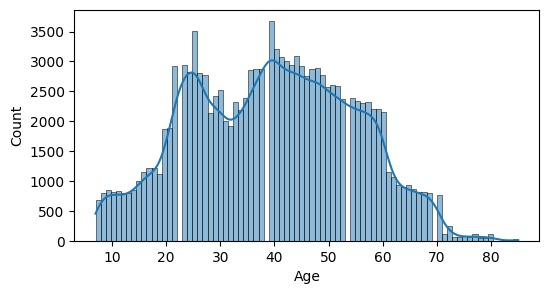

In [207]:
plt.figure(figsize=(6,3))
sns.histplot(data['Age'], kde = True)

<Axes: xlabel='Age'>

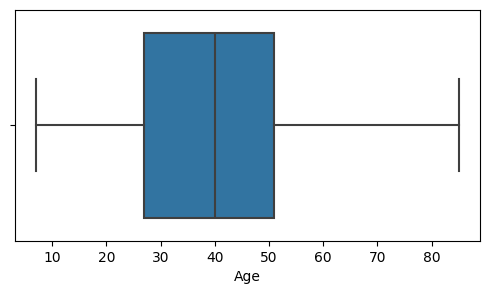

In [209]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Age'])

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Flight Distance', ylabel='Count'>

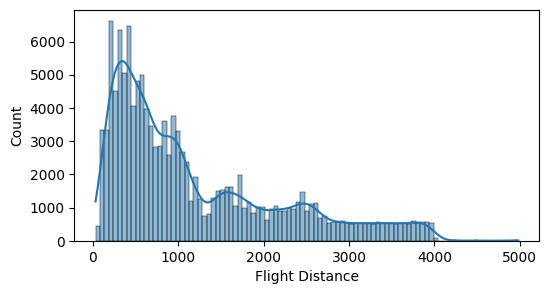

In [211]:
plt.figure(figsize=(6,3))
sns.histplot(data['Flight Distance'], kde=True)

In [213]:
data['Flight Distance'].skew()

1.1084329966476683

In [215]:
data.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65703,105773,89445,61990,73225


In [217]:
data.value_counts('Gender')

Gender
Female    65703
Male      63784
Name: count, dtype: int64

- The data in Gender column is almost equally distributed across two categories

In [219]:
data.value_counts('Customer Type')


Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64

In [221]:
23780 / (106100 + 23780)

0.1830920850015399

- The data in Customer Type column is a bit biased towards *Loyal Customer*
- "disloyal Customer" makes up about 18.4% of the data. That gives us a clearer view of the class imbalance.

In [223]:
data.value_counts('Type of Travel')

Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64

In [225]:
40187 / (89693 + 40187)

0.309416384354789

- Personal Travel makes up roughly 30%, while Business Travel accounts for 69%.

In [227]:
data.value_counts('Class')

Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64

- The majority of passengers fly in premium classes (Business and Eco), while Eco Plus represents a smaller.
- Eco Plus is generally more expensive than Economy, but less expensive than Business.

In [229]:
data.value_counts('satisfaction')

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

- The majority of passengers report being neutral or dissatisfied, indicating potential service gaps or unmet expectations despite a significant number of satisfied flyers.

In [109]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Univariate Analysis
- **Numerical Univariate Visual and Non Visual Analysis**

In [111]:
num_cols = data.select_dtypes(include = 'number').columns
num_cols

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [113]:
def cont_vis_analysis(data,col):

    series = data[col]
    print('Non Visual Analysis:')
    print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']))
    print('-'*20)
    
    fig, axes = plt.subplots(1,3,figsize=(10,4), layout = 'constrained')
    fig.suptitle('Continuous Data Distributions')

    axes[0].set_title('Histogram')
    sns.histplot(data[col], bins = 20, ax = axes[0])

    axes[1].set_title('Kde Plot')
    sns.kdeplot(data[col], ax = axes[1])

    axes[2].set_title('Box Plot')
    sns.boxplot(data[col], ax = axes[2])

    fig.show()


Non Visual Analysis:
count     129487.000000
min            7.000000
max           85.000000
mean          39.428761
median        40.000000
var          228.541731
std           15.117597
skew          -0.003376
kurt          -0.718737
Name: Age, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\2890655789.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


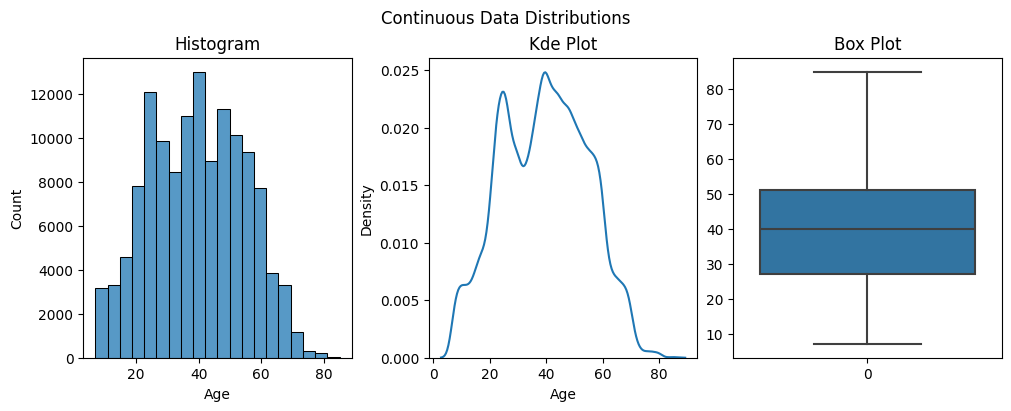

In [252]:
cont_vis_analysis(data,'Age')

In [92]:
min_age, max_age = min(data['Age']), max(data['Age'])
print(f'Minimum age in the dataset is: {min_age}')
print(f'Maximum age in the dataset is: {max_age}')

Minimum age in the dataset is: 7
Maximum age in the dataset is: 85


- This trio of plots gives a well-rounded picture of the Age distribution among passengers:
    - The histogram shows most travelers are between 30 and 50 years old, forming a symmetric bell around the 40s.
    - The KDE plot confirms this smooth, balanced distribution — no sharp skews or irregular peaks.
    - The box plot reinforces the story: the median is close to 40, with most values tucked within the 30–50 range and no major outliers.

Non Visual Analysis:
count     129487.000000
min           31.000000
max         4983.000000
mean        1190.210662
median       844.000000
var       995127.857371
std          997.560954
skew           1.108433
kurt           0.265976
Name: Flight Distance, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\2890655789.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


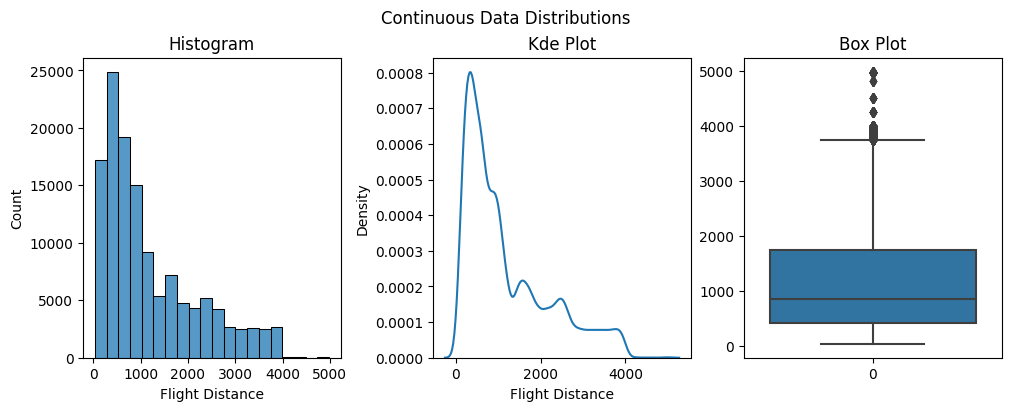

In [254]:
cont_vis_analysis(data,'Flight Distance')

- This trio of plots paints a clear picture of how Flight Distance is distributed across passengers:
    - **Histogram:** The majority of flights are short-haul — distances under 1000 dominate the scene, with frequency tapering off rapidly as distance increases.
    - **KDE Plot:** Offers a smooth, continuous view echoing the histogram — strong peak density in the short-distance range, followed by a long right tail, hinting at a few very long-haul flights.
    - **Box Plot:** Confirms a right-skewed distribution, with most values tightly packed between ~500 and 2000, but several outliers stretching beyond 4000. Median sits around 1000.

Non Visual Analysis:
count     129487.000000
min            0.000000
max         1592.000000
mean          14.643385
median         0.000000
var         1438.902365
std           37.932867
skew           6.853578
kurt         101.882947
Name: Departure Delay in Minutes, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\2890655789.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


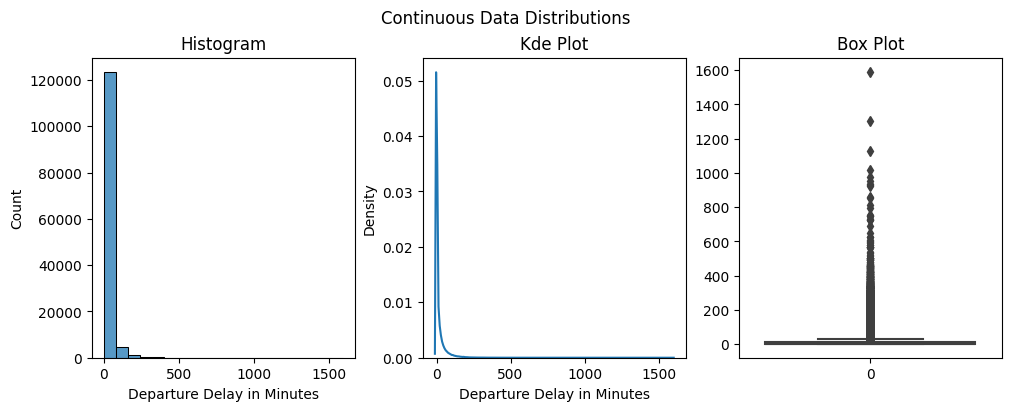

In [256]:
cont_vis_analysis(data,'Departure Delay in Minutes')

- This set of plots gives a compelling look into Departure Delay in Minutes across all flights:
    - **Histogram:** The overwhelming bulk of flights experience little to no departure delay—most bars spike right near zero, with frequency dropping off rapidly. Delays beyond ~500 minutes are extremely rare.
    - **KDE Plot:** Confirms a sharp right skew—extremely high density around 0, then thinning out dramatically. This suggests departure delays aren't normally distributed; they’re concentrated in the short-delay region with a few extreme outliers.
    - **Box Plot:** Tells the same story visually—the median is close to zero, the IQR is tight, and there’s a long whisker plus many outliers stretching up toward 1600 minutes.

Non Visual Analysis:
count     129487.000000
min            0.000000
max         1584.000000
mean          15.091129
median         0.000000
var         1479.606248
std           38.465650
skew           6.670125
kurt          95.117114
Name: Arrival Delay in Minutes, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\2890655789.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


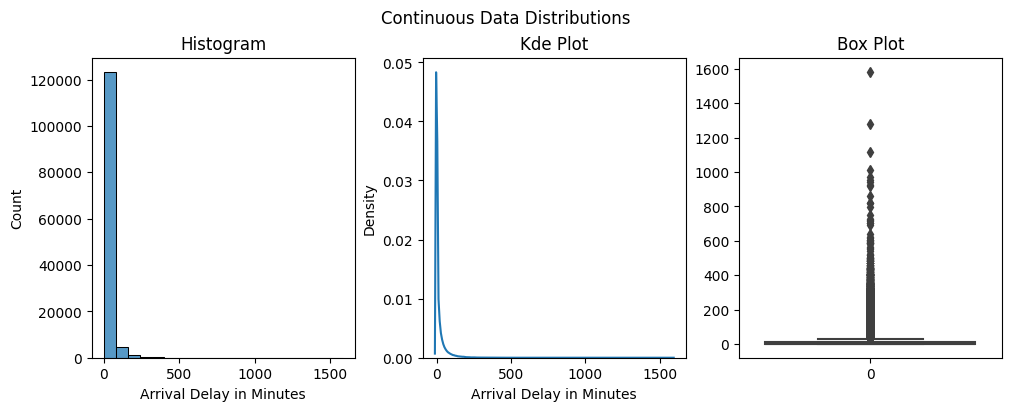

In [259]:
cont_vis_analysis(data,'Arrival Delay in Minutes')

- This visualization of Arrival Delay in Minutes clearly echoes what we saw with departure delays — and reinforces the skewed nature of airline timing data:
    - **Histogram:** Most flights arrive on time or just slightly delayed, with a steep drop in frequency as delay increases. You can spot that sharp peak near zero — indicating a heavy concentration of on-time arrivals.
    - **KDE Plot:** Smooths that pattern and confirms it — the bulk of the density is tightly packed on the lower end, showing arrival delays are strongly right-skewed, much like departure delays.
    - **Box Plot:** Emphasizes that skew with a compact IQR and a long string of outliers stretching beyond 1500 minutes. The median is close to zero again, reinforcing the notion that most passengers experience little to no arrival delay.
 
- **Takeaway:** These delays aren't randomly spread — they cluster tightly around low values, with a few extreme outliers pulling the average upward.

In [ ]:
['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat com4fort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']

In [115]:
def cont_vis_analysis_ratings(data,col):

    series = data[col]
    print('Non Visual Analysis:')
    print(series.agg(['count','min','max','mean','median','var','std']))
    print('-'*20)
    
    fig, axes = plt.subplots(1,2,figsize=(8, 3), layout = 'constrained')
    fig.suptitle('Continuous Data Distributions (Ratings)')

    axes[0].set_title('Bar Plot')
    sns.countplot(x = col, data = data, ax = axes[0])

    axes[1].set_title('Pie Chart')
    value_count = data[col].value_counts()
    axes[1].pie(value_count, labels = value_count.index, autopct = '%1.1f%%')

    fig.show()
    

Non Visual Analysis:
count     129487.000000
min            0.000000
max            5.000000
mean           2.728544
median         3.000000
var            1.766865
std            1.329235
Name: Inflight wifi service, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


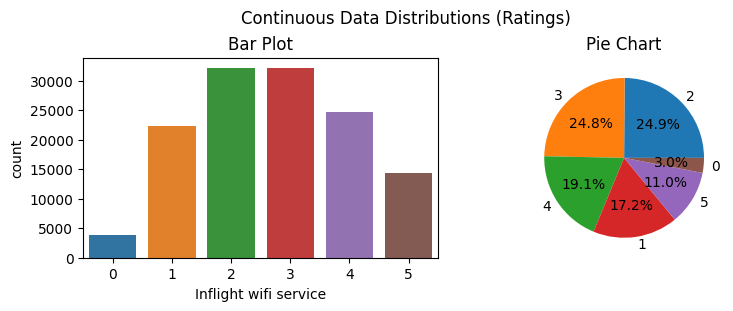

In [264]:
cont_vis_analysis_ratings(data,'Inflight wifi service')

- Passengers mostly feel neutral to slightly positive about the wifi experience.
- A lot of them gave it a mid-range score (like 2 or 3), meaning it’s not great, but not terrible either. Very few people loved it or absolutely disliked it.
- So, overall **the wifi is “just okay” for most flyers. Not a big crowd-pleaser, but not a huge complaint either.**

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           3.057599
median         3.000000
var            2.330940
std            1.526741
Name: Departure/Arrival time convenient, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


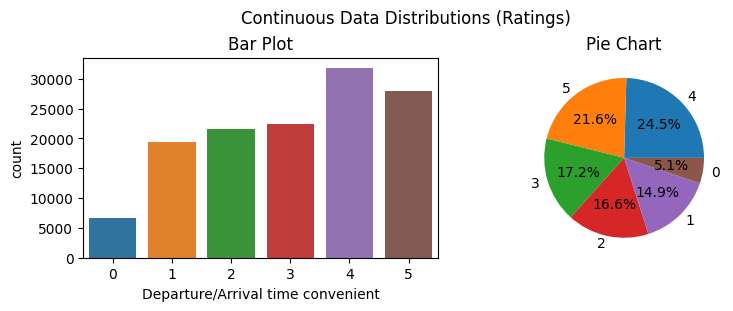

In [257]:
cont_vis_analysis_ratings(data,'Departure/Arrival time convenient')

- Passengers generally feel that the departure and arrival times are quite convenient. Most people gave ratings between 3 and 5, especially 4 — which is the most popular.
- Only a small group thought the timing was really bad (rating 0 or 1).
- So overall, this feature seems to leave a positive impression.

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           2.756876
median         3.000000
var            1.964874
std            1.401740
Name: Ease of Online booking, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


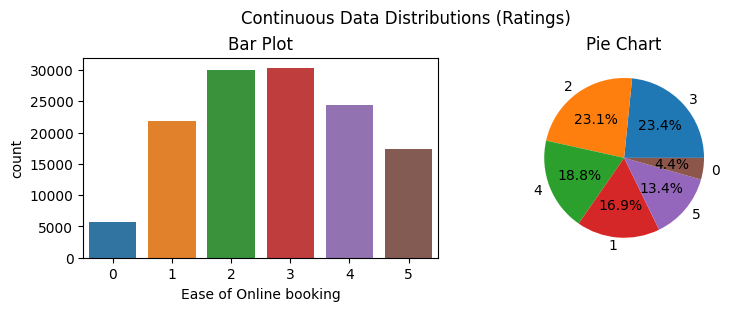

In [259]:
cont_vis_analysis_ratings(data,'Ease of Online booking')

- This plot gives us a clear sense of how passengers feel about the Ease of Online Booking:
    - Most people rated the process somewhere in the middle — with 2 and 3 being the most common scores. A smaller group found it either really easy or very frustrating, but they’re in the minority.
    - So, in simple terms: booking online felt “fine” to most passengers — not amazing, not awful. Just okay.

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           2.976925
median         3.000000
var            1.634613
std            1.278520
Name: Gate location, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


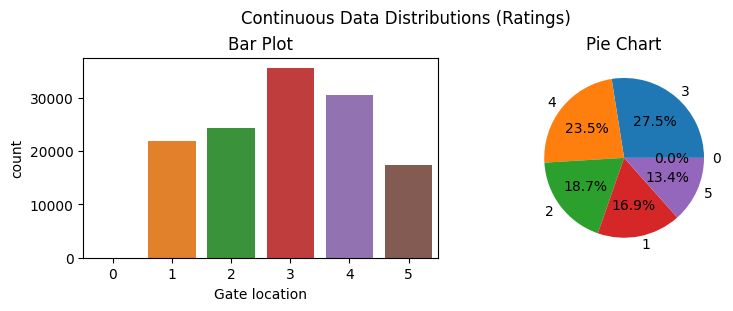

In [261]:
cont_vis_analysis_ratings(data,'Gate location')

- This plot shows how passengers feel about Gate Location at the airport:
    - Most travelers gave it a middle-to-good score — especially ratings 3 and 4, which were the most common. Very few rated it poorly, and while a small group gave it a top score (5), the majority seemed just reasonably satisfied.
    - In simple terms: passengers are mostly okay with the gate location — not too many complaints, not a ton of excitement either.

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           3.204774
median         3.000000
var            1.768722
std            1.329933
Name: Food and drink, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


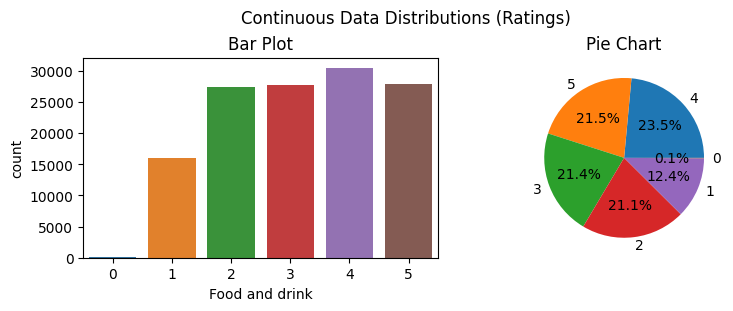

In [263]:
cont_vis_analysis_ratings(data,'Food and drink')

- Most passengers feel fairly satisfied with the food and drink on board. Ratings hover around 3 and 4 for the majority, meaning it’s not a standout feature, but not a major letdown either.
- Only a small group rated it poorly (0 or 1), and a decent chunk gave it a high score.
- So overall: passengers think the food is “pretty decent”

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           3.252633
median         3.000000
var            1.824441
std            1.350719
Name: Online boarding, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


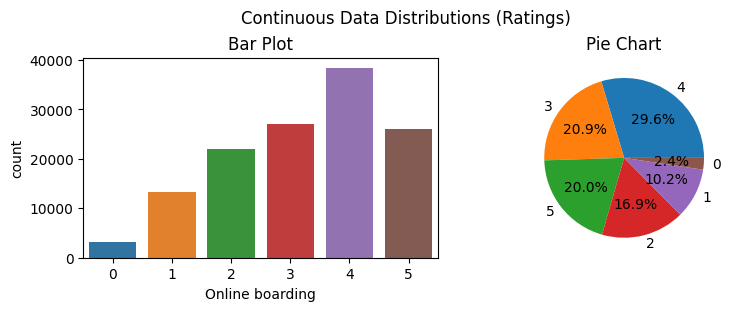

In [265]:
cont_vis_analysis_ratings(data,'Online boarding')

- Passengers seem generally happy with the online boarding experience. Most rated it between 3 and 5, with 4 being the most common score.
- That suggests the process feels smooth and reliable for a large chunk of flyers.
- Only a small percentage gave it really low scores (like 0 or 1), which tells us frustration is relatively rare here.

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           3.441361
median         4.000000
var            1.740523
std            1.319289
Name: Seat comfort, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


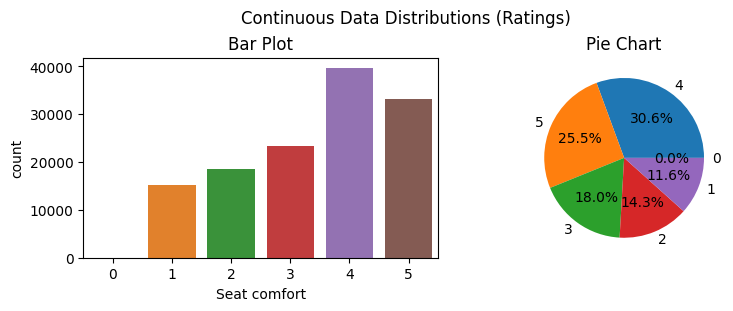

In [267]:
cont_vis_analysis_ratings(data,'Seat comfort')

- Most passengers feel fairly comfortable in their seats. Ratings of 4 and 5 together make up over half the total responses, showing that people generally had a good experience.
- The mid-range (3) is also common, while only a small group gave low scores (0, 1, or 2).

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           3.358077
median         4.000000
var            1.779687
std            1.334049
Name: Inflight entertainment, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


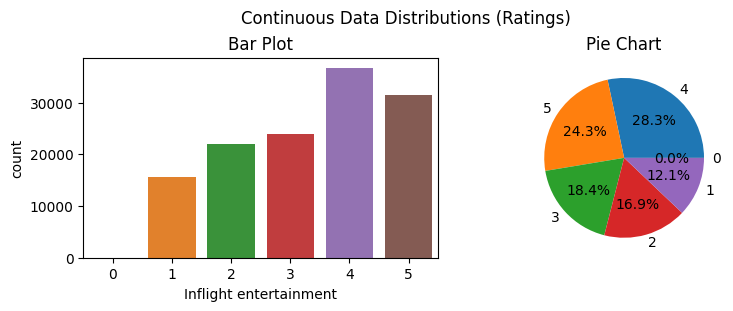

In [269]:
cont_vis_analysis_ratings(data,'Inflight entertainment')

- Passengers seem to genuinely enjoy the inflight entertainment. Ratings of 4 and 5 together make up over half the responses, showing that many flyers had a good time with the movies, music, or shows available.
- Mid-range ratings like 3 are also quite common, while lower scores are less frequent.

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           3.383023
median         4.000000
var            1.656625
std            1.287099
Name: On-board service, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


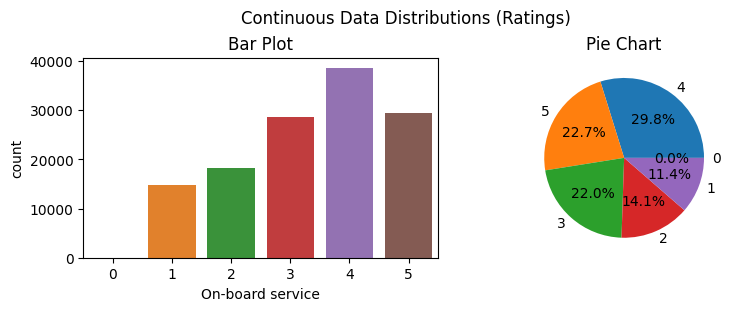

In [271]:
cont_vis_analysis_ratings(data,'On-board service')

- Passengers feel pretty good about the on-board service overall. Ratings are stacked toward the higher end — most people gave it a 4 or 5, and 3 is also quite popular.
- Very few passengers gave it really low scores.
- So in plain terms: people are generally happy with how they’re treated on board — things like crew behavior, cleanliness, and responsiveness seem to land well with most flyers.

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           3.350878
median         4.000000
var            1.732519
std            1.316252
Name: Leg room service, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


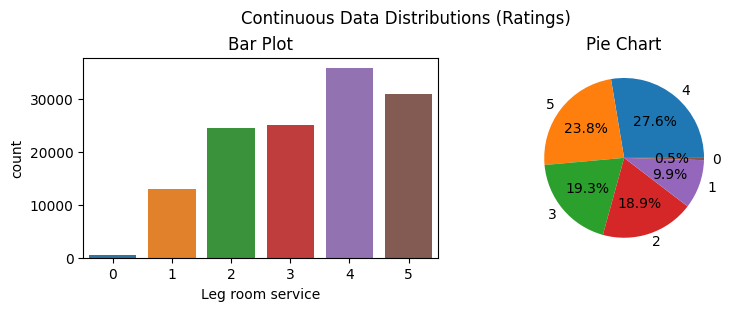

In [273]:
cont_vis_analysis_ratings(data,'Leg room service')

- Most passengers seem fairly satisfied with the leg room. The majority of ratings fall between 3 and 5 — especially 4, which is the most common.
- A smaller portion gave it low ratings like 0 or 1, so complaints exist but they’re clearly in the minority.
- So in plain terms: people generally feel okay to good about the space they had. It’s not a huge pain point, and might even contribute positively to their overall experience.

Non Visual Analysis:
count     129880.000000
min            1.000000
max            5.000000
mean           3.632114
median         4.000000
var            1.392458
std            1.180025
Name: Baggage handling, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


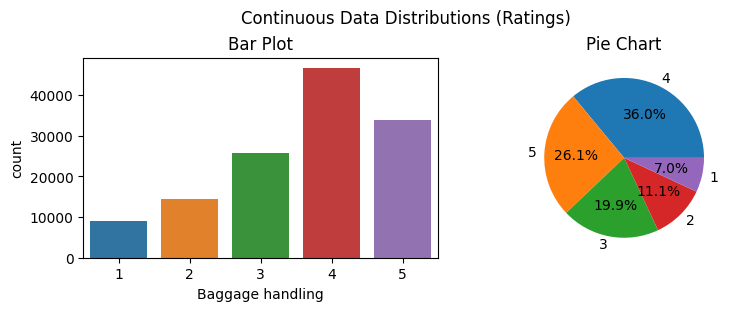

In [275]:
cont_vis_analysis_ratings(data,'Baggage handling')

- Most passengers feel pretty satisfied with how their baggage is managed. Ratings of 4 and 5 together make up over 60% of all responses, showing strong trust in this service. Ratings in the middle (like 3) are also fairly common.
- Only a small number of people gave low ratings, suggesting serious issues are rare.

Non Visual Analysis:
count     129880.000000
min            0.000000
max            5.000000
mean           3.306267
median         3.000000
var            1.603225
std            1.266185
Name: Checkin service, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_19352\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


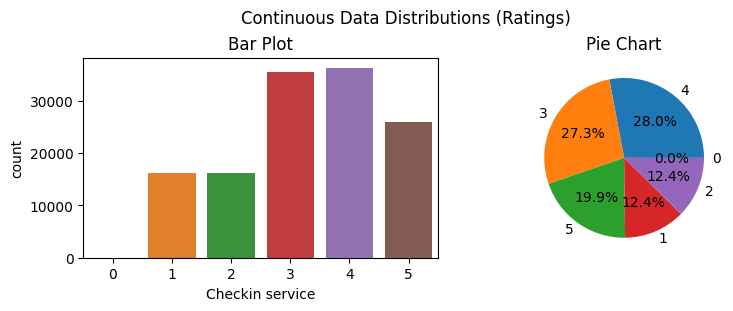

In [277]:
cont_vis_analysis_ratings(data,'Checkin service')

- Most travelers seem quite satisfied — ratings of 3 and 4 dominate, with 5 also showing up frequently. Only a small portion rated the experience poorly (0 or 1), meaning serious frustration is rare.

Non Visual Analysis:
count     129487.000000
min            0.000000
max            5.000000
mean           3.642373
median         4.000000
var            1.384420
std            1.176614
Name: Inflight service, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


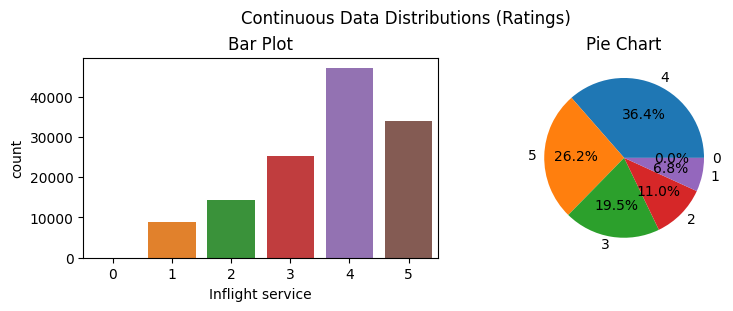

In [293]:
cont_vis_analysis_ratings(data,'Inflight service')

- Most people seem to have had a really positive experience — the highest number of ratings are 4 and 5.
- That means passengers generally liked the service they received while flying. Mid-range scores like 3 are also common, while very few gave it a low rating.
- So in simple terms: inflight service feels like a strong point for this airline — most passengers enjoyed it, and that likely plays a big role in their overall satisfaction.- 

Non Visual Analysis:
count     129487.000000
min            0.000000
max            5.000000
mean           3.286222
median         3.000000
var            1.725608
std            1.313624
Name: Cleanliness, dtype: float64
--------------------


C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\4290500201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


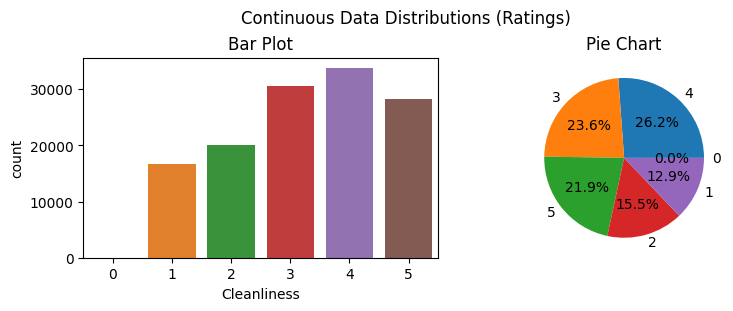

In [291]:
cont_vis_analysis_ratings(data,'Cleanliness')

- Passengers generally feel cleanliness on board is quite good. Most people gave ratings from 3 to 5, with 4 being the most common.
- A smaller group gave it lower scores, but they’re clearly in the minority.

### Categorical Univariate Analysis

In [117]:
def cat_univariate_analysis(data,col):

    print('Value counts for column: ',col)
    print(data[col].value_counts())
    print('Null values in: ')
    print(data[col].isnull().sum())
    
    fig, axes = plt.subplots(1,2,figsize=(8, 3), layout = 'constrained')
    fig.suptitle('Categorical Data Distributions')

    axes[0].set_title('Bar Plot')
    sns.countplot(x = col, data = data, ax = axes[0])

    axes[1].set_title('Pie Chart')
    value_count = data[col].value_counts()
    axes[1].pie(value_count, labels = value_count.index, autopct = '%1.1f%%')

    fig.show()

In [119]:
data.select_dtypes(include='O').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

Value counts for column:  Gender
Gender
Female    65703
Male      63784
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\2305391094.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


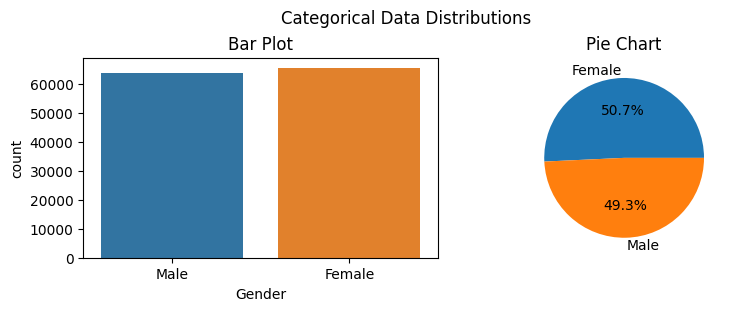

In [315]:
cat_univariate_analysis(data,'Gender')

- Both the bar plot and pie chart tell the same story — the number of male and female travelers is almost equal, with a slight edge toward females (about 50.7%). It’s as close to a 50-50 split.
- So in simple terms: gender is evenly represented here.

Value counts for column:  Customer Type
Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\2305391094.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


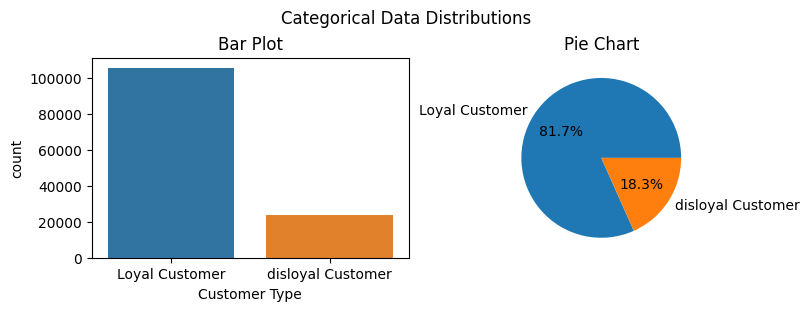

In [313]:
cat_univariate_analysis(data,'Customer Type')

- The majority of passengers in this dataset are loyal customers — about 82%. Disloyal customers make up a much smaller portion, around 18%. The difference is quite large, so it's clear that repeat flyers dominate the scene.
- In simple terms: most people traveling here are regular customers, which could play a big role in satisfaction — loyal customers often have higher expectations, but also stronger relationships with the airline.

Value counts for column:  Type of Travel
Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\2305391094.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


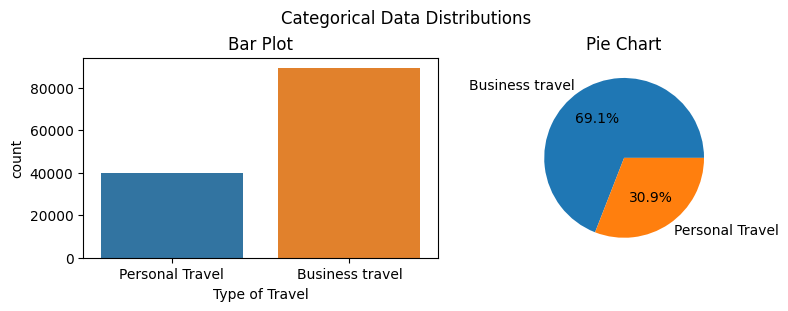

In [311]:
cat_univariate_analysis(data,'Type of Travel')

- most people flying here are doing so for work, which might mean their expectations are more focused on efficiency, reliability, and comfort.
- That could influence how they rate various services — something we’ll want to dig into when looking at satisfaction later.

Value counts for column:  Class
Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\2305391094.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


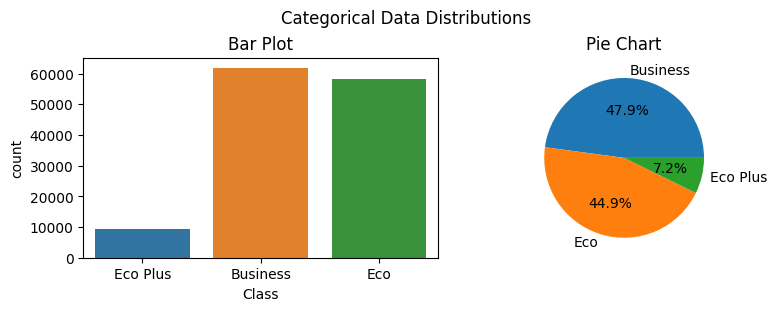

In [309]:
cat_univariate_analysis(data,'Class')

- Most passengers in this dataset fly in either Business class or Economy, making up nearly the entire split — about 48% and 45% respectively. Eco Plus is the clear minority here at just over 7%.

Value counts for column:  satisfaction
satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_20796\2305391094.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


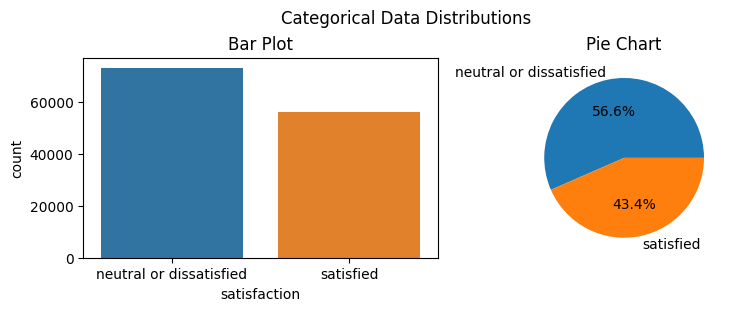

In [307]:
cat_univariate_analysis(data,'satisfaction')

- A bit more than half of the passengers are neutral or dissatisfied.
- The rest — just under 44% — are satisfied.

## Bivariate Analysis
- Categorical vs. Categorical (Target Variable 'Satisfaction')

In [328]:
def cat_cat_bivar_analysis(data, col1, col2):
    plt.figure(figsize=(10,4))
    ax = sns.countplot(x=data[col1], data = data, hue = data[col2])
    plt.title('Satisfaction by Customer Type')
    
    # Adding count labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, label_type = 'edge', fontsize = 10, padding = 3)
    
    plt.tight_layout()
    plt.show()

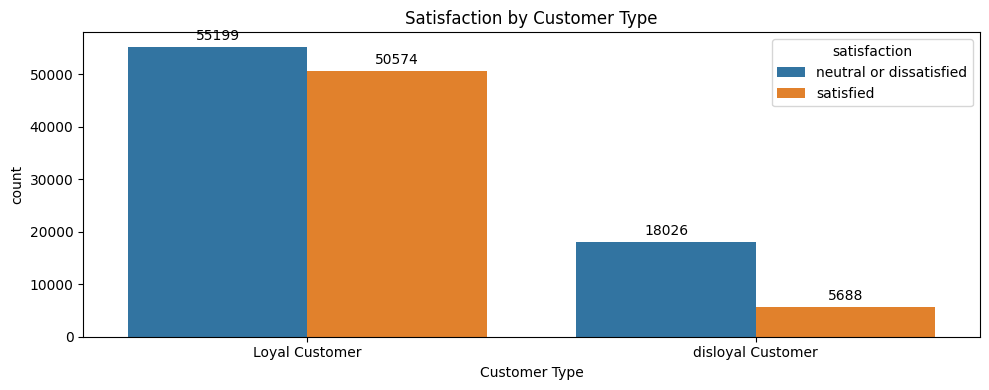

In [330]:
cat_cat_bivar_analysis(data, 'Customer Type', 'satisfaction')

- Even among loyal customers, nearly half are not fully satisfied.
- This signals a gap between customer retention and actual happiness — meaning the airline may be keeping passengers, but not necessarily delighting them.
- It's a clear opportunity to reconnect with core customers and elevate their experience.
  
- And among disloyal customers, the contrast is striking: most are not satisfied, and only a small group actually feel happy with their experience.

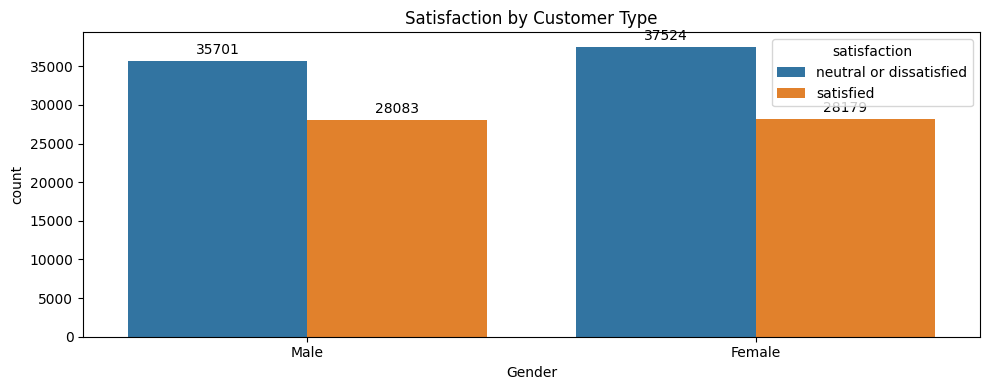

In [332]:
cat_cat_bivar_analysis(data, 'Gender', 'satisfaction')

- **What's the problem:** A majority of both male and female passengers are neutral or dissatisfied — with females showing a slightly higher dissatisfaction rate. This signals that gender doesn’t heavily impact the experience, but overall satisfaction levels are low across the board.

- **What might be causing it:** The issue likely isn’t rooted in gender, but rather in service features that fall short of expectations for both groups — things like inflight amenities, comfort, or delays. Since gender-based preference isn’t clearly driving satisfaction, the problem likely lies in universal service quality.

- **How to improve results:** Focus on enhancing core experiences for everyone, regardless of gender — better boarding, more reliable wifi, improved comfort, and personalized communication. Also, collecting gender-segmented feedback on specific features might uncover subtle preferences that the current survey isn’t capturing.

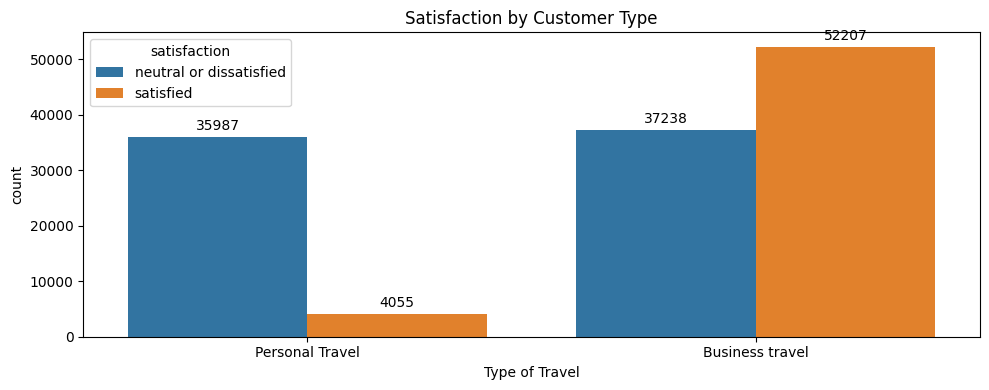

In [334]:
cat_cat_bivar_analysis(data, 'Type of Travel', 'satisfaction')

- **What’s the problem:** There’s a huge gap in satisfaction between business and personal travelers. While business travelers are mostly satisfied (over 58% of them), a vast majority of personal travelers — nearly 90% — are neutral or dissatisfied.

- **What might be causing this:** Business travelers likely get better perks, priority check-ins, lounges, smoother services, or perhaps just fly more often and know what to expect. In contrast, personal travelers may have higher emotional expectations (think vacations, special moments) and are more sensitive to delays, discomfort, or lack of personalized service.

- **How to improve results:** Airlines should focus on improving the experience for personal travelers, clearer communication, smoother booking, thoughtful inflight touches. A small uplift here could drive big gains in satisfaction, especially since personal flyers form a sizable chunk of future loyalists.

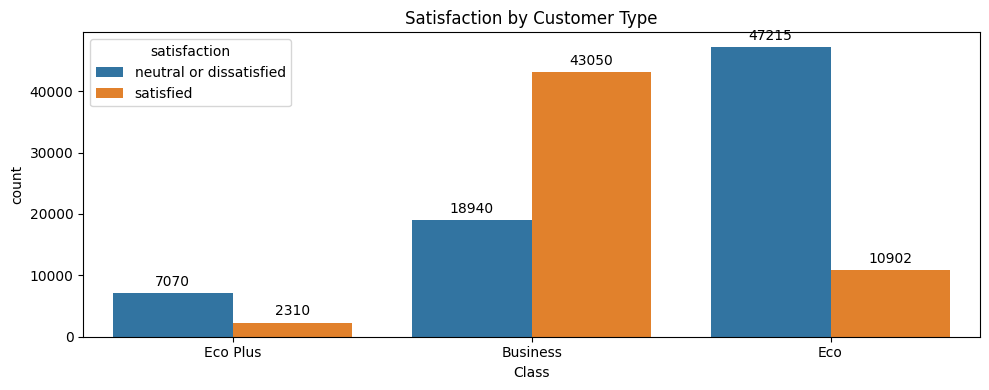

In [336]:
cat_cat_bivar_analysis(data, 'Class', 'satisfaction')

- **Problem:** Eco class has the highest dissatisfaction — over 47K passengers are neutral or unhappy, far outweighing the 10K who are satisfied.

- **Cause:** Likely due to limited comfort, fewer perks, and lower service levels compared to Business or Eco Plus.

- **Improvement:** Elevate the economy experience — better legroom, cleaner cabins, smoother onboarding — even small touches could shift perception significantly.

In [338]:
data.value_counts('satisfaction')

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

In [141]:
data.select_dtypes(include = 'O').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

**Key Takeaways:-**

- Most of the passengers fall between age of 30 and 50 years, median age is 40. Maximum age is 85 years and minimum age is 7 years.
- Most of the passengers are travelling under 1200 - 1400 kilometers, comparitively less people are in range between 1400 and 4000 kilometers.
- Most flights depart on time or with minimal delay, with a few flights delayed over 1500 minutes.
- Same as Departure Delay in case of Arrival Delay.
- People flying for personal reasons are mostly unhappy, unlike business travelers who are generally satisfied. The airline should work on making things better for casual or vacation flyers.
- Economy class passengers show highest dissatisfaction; upgrading their experience could boost overall satisfaction.
- Overall, airline services are moderately satisfactory, with most features rated between 3 and 4 — suggesting passengers find the experience acceptable, but there’s clear room to elevate comfort, convenience, and consistency.

### Numerical Features vs Satisfaction

In [378]:
# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=cat_col,y=num_col,data=data)

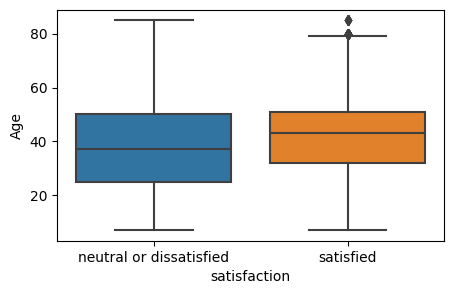

In [380]:
cont_cat_bivar_analysis(data,'satisfaction','Age')

- **Problem:** Both groups overlap heavily, but satisfied passengers tend to be slightly older, with a median age around 45 vs 40.
- **Cause:** Older passengers may have different expectations or more travel experience, leading to higher tolerance or better planning.
- **Improvement:** Tailor services toward younger travelers too — maybe with more tech-enabled experiences or clearer pre-flight communication, since they seem less easily satisfied.

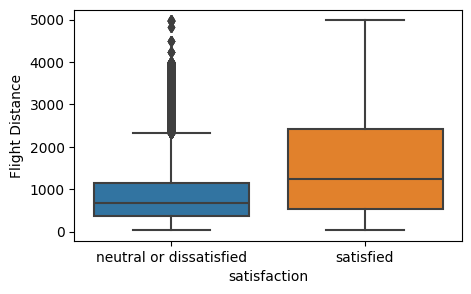

In [382]:
cont_cat_bivar_analysis(data,'satisfaction','Flight Distance')  

- **Problem:** Passengers who are neutral or dissatisfied mostly flew shorter distances, while satisfied ones typically flew longer.
- **Cause:** Longer flights may offer better amenities and more time to enjoy services — increasing satisfaction. Short-haul routes may feel rushed or bare-bones.
- **Improvement:** To boost satisfaction on shorter flights, the airline could enhance quick-service quality — smoother boarding, faster refreshments, maybe a more polished inflight experience in less time.

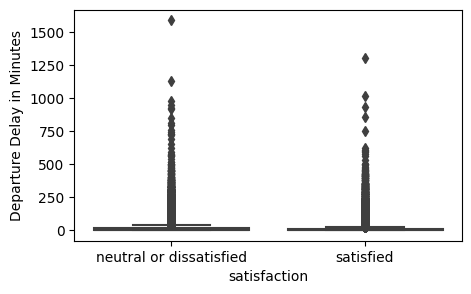

In [384]:
cont_cat_bivar_analysis(data,'satisfaction','Departure Delay in Minutes')  

- **Problem:** Departure delays are highly variable, with outliers reaching over 1500 minutes — even among passengers who reported being satisfied.
- **Cause:** It shows that delay alone doesn’t guarantee dissatisfaction. Some passengers may tolerate delays better, especially if other aspects (like service or comfort) compensate for it.
- **Improvement:** While delays can't always be avoided, the airline could focus on proactive communication, smoother handling, and passenger care during delays to maintain satisfaction.

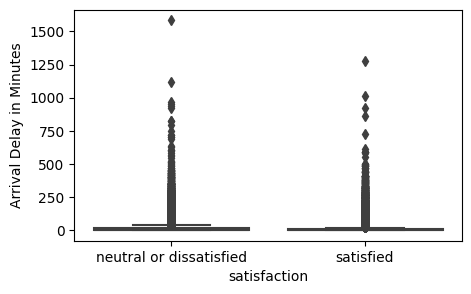

In [386]:
cont_cat_bivar_analysis(data,'satisfaction','Arrival Delay in Minutes')  

- **Problem:** Arrival delays vary widely in both groups, with outliers hitting over 1500 minutes — and interestingly, some satisfied passengers still experienced big delays.
- **Cause:** Like departure delays, arrival delays alone don’t seem to decide satisfaction. It suggests passengers might forgive timing issues if other aspects — like inflight service, comfort, or communication — are handled well.
- **Improvement:** Focus on managing passenger experience during delays — clear updates, support staff, smoother rebooking — can help retain satisfaction even when things go off-schedule.

In [437]:
def plot_avg_rating_by_satisfaction(data, col):

    # average rating per satisfaction group
    avg_ratings = data.groupby('satisfaction')[col].mean().reset_index()
    
    # bar chart
    plt.figure(figsize=(6, 3))
    sns.barplot(x='satisfaction', y=col, data=avg_ratings, palette='viridis')
    plt.title(f'Avg {col} by Satisfaction Level (Rating)')
    plt.ylabel(f'Average {col}')
    plt.xlabel('Satisfaction')
    plt.ylim(0, 5)  
    plt.tight_layout()
    plt.show()

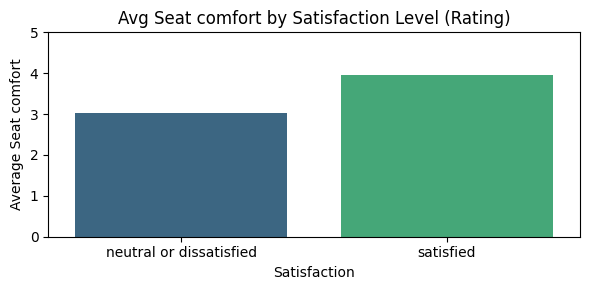

In [439]:
plot_avg_rating_by_satisfaction(data, 'Seat comfort')

In [123]:
data.groupby("satisfaction")["Seat comfort"].mean()

satisfaction
neutral or dissatisfied    3.038525
satisfied                  3.966176
Name: Seat comfort, dtype: float64

In [125]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

# Encode 'satisfaction' as binary: 0 = neutral/dissatisfied, 1 = satisfied
data["satisfaction_encoded"] = LabelEncoder().fit_transform(data["satisfaction"])
pointbiserialr(data["satisfaction_encoded"], data["Seat comfort"])

SignificanceResult(statistic=0.34857594809035575, pvalue=0.0)

- Satisfied passengers rate seat comfort higher on average than those who are neutral or dissatisfied — showing a positive link between comfort and satisfaction.

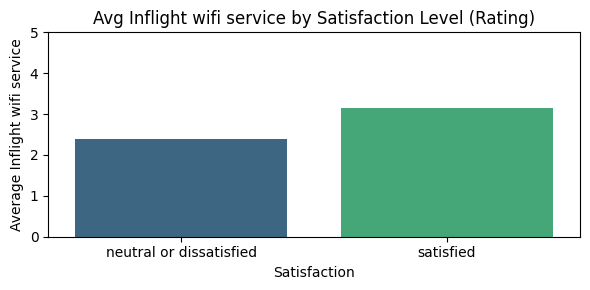

In [441]:
plot_avg_rating_by_satisfaction(data, 'Inflight wifi service')

- Satisfied passengers give higher ratings for inflight WiFi service (around 3.5) compared to those who are neutral or dissatisfied (around 2.5). This shows WiFi quality plays a role in overall satisfaction.

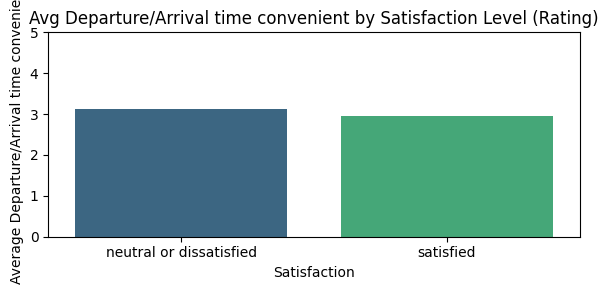

In [443]:
plot_avg_rating_by_satisfaction(data, 'Departure/Arrival time convenient')

- Interestingly, neutral or dissatisfied passengers rate departure/arrival time convenience slightly higher than satisfied ones — suggesting this feature might not drive satisfaction directly.
- ❌

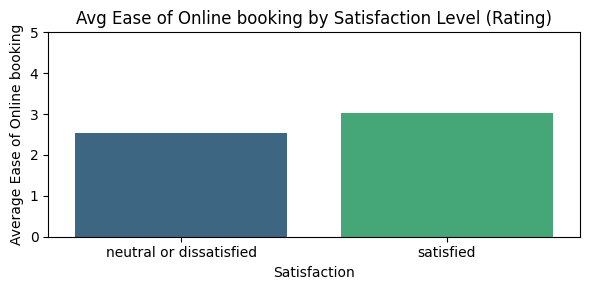

In [447]:
plot_avg_rating_by_satisfaction(data, 'Ease of Online booking')

- Passengers who are satisfied find online booking easier (avg rating ≈ 3.2) than those who are dissatisfied (≈ 2.3), suggesting booking experience plays a role in overall satisfaction.

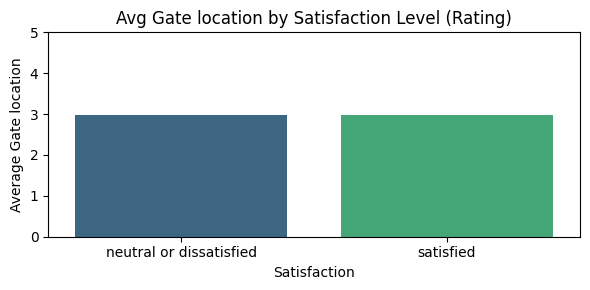

In [449]:
plot_avg_rating_by_satisfaction(data, 'Gate location')

- Surprisingly, neutral or dissatisfied passengers rate gate location slightly higher than satisfied ones, a subtle inverse pattern that suggests this feature doesn't align well with overall satisfaction trends.
- ❌

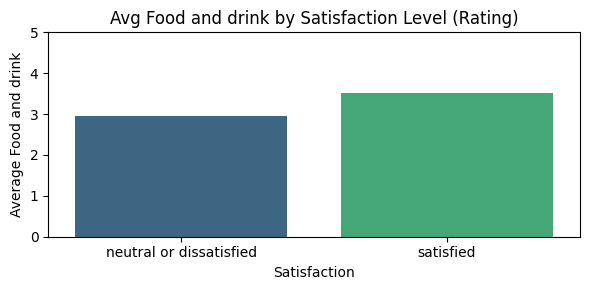

In [451]:
plot_avg_rating_by_satisfaction(data, 'Food and drink')

- Satisfied passengers give clearly higher scores for food and drink (≈ 4.1) compared to those who are neutral or dissatisfied (≈ 3.1), indicating in-flight catering plays a strong role in shaping overall experience.

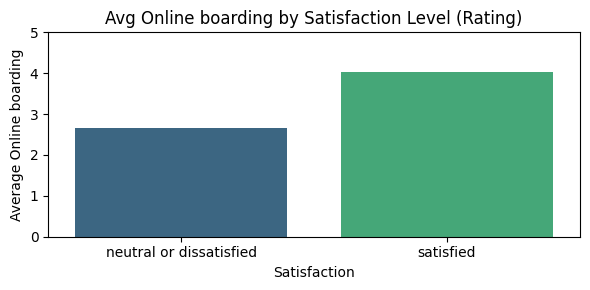

In [453]:
plot_avg_rating_by_satisfaction(data, 'Online boarding')

- Satisfied passengers give online boarding higher ratings (≈ 4), while neutral or dissatisfied passengers average around 3, showing that ease and speed of online check-in correlates with better overall experience.

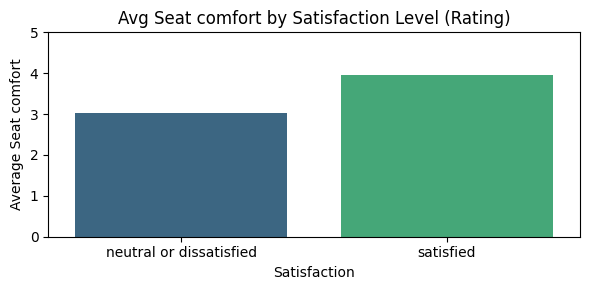

In [455]:
plot_avg_rating_by_satisfaction(data, 'Seat comfort')

- Satisfied passengers consistently give higher ratings for seat comfort compared to those who are neutral or dissatisfied, indicating that comfort is a clear contributor to their positive experience.

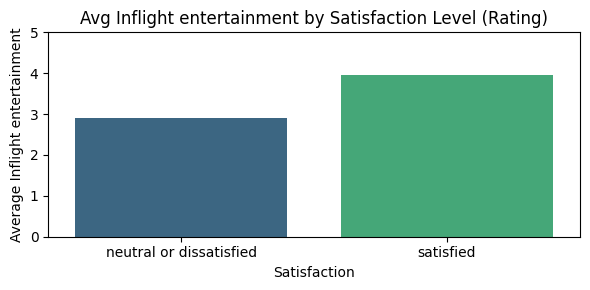

In [457]:
plot_avg_rating_by_satisfaction(data, 'Inflight entertainment')

- Satisfied passengers rate inflight entertainment much higher (≈ 4) than those who are neutral or dissatisfied (≈ 3), indicating a strong connection between quality entertainment and overall satisfaction.

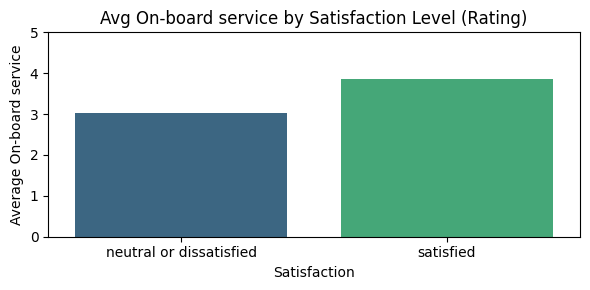

In [459]:
plot_avg_rating_by_satisfaction(data, 'On-board service')

- Passengers who are satisfied rate on-board service significantly higher (≈ 4) than those neutral or dissatisfied (=3), showing that attentive in-flight service contributes meaningfully to the experience.

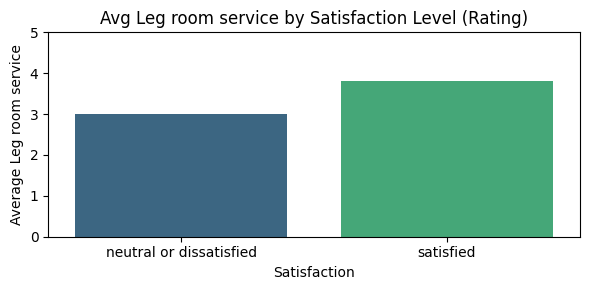

In [461]:
plot_avg_rating_by_satisfaction(data, 'Leg room service')

- Satisfied passengers give noticeably higher ratings for leg room service (≈ 4), while neutral or dissatisfied ones hover around 3 — showing a strong positive link between legroom and satisfaction.

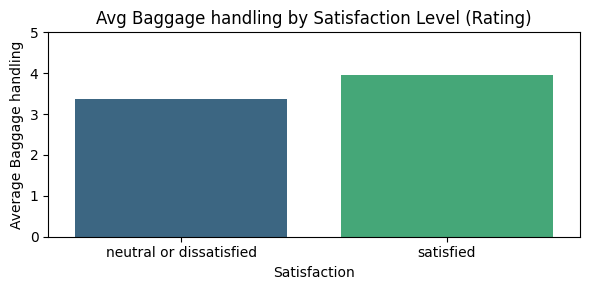

In [463]:
plot_avg_rating_by_satisfaction(data, 'Baggage handling')

- Satisfied passengers report significantly better experiences with baggage handling (avg rating ≈ 4) than those who are neutral or dissatisfied (≈ 3.3), suggesting it plays an important role in shaping satisfaction.

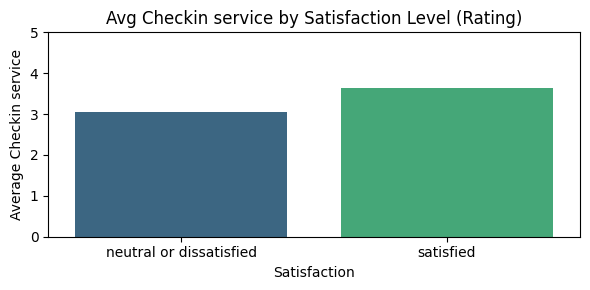

In [465]:
plot_avg_rating_by_satisfaction(data, 'Checkin service')

- Passengers who are satisfied give clearly higher ratings for check-in service (≈ 3.8) than those neutral or dissatisfied (≈ 3), suggesting the efficiency and friendliness at check-in contribute meaningfully to satisfaction.

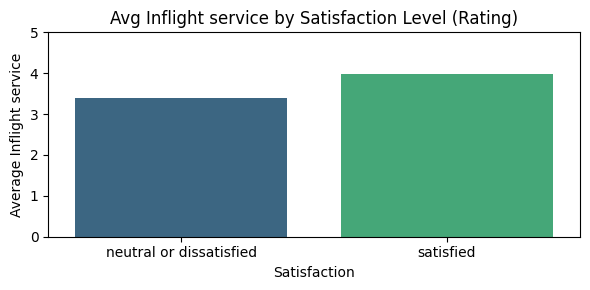

In [467]:
plot_avg_rating_by_satisfaction(data, 'Inflight service')

- Satisfied passengers give much higher average ratings (= 4) for inflight service than neutral or dissatisfied ones (≈ 3.3), making it one of the clearest indicators of satisfaction.

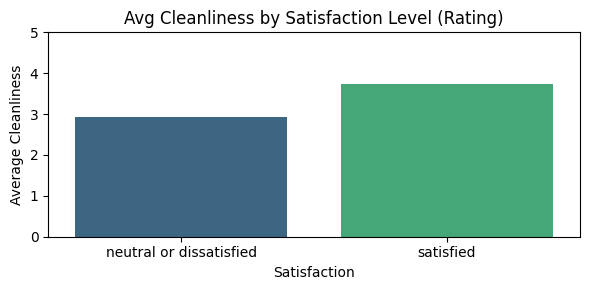

In [469]:
plot_avg_rating_by_satisfaction(data, 'Cleanliness')

- Satisfied passengers give cleanliness noticeably higher ratings (≈ 4) than neutral or dissatisfied ones (≈ 3), highlighting that a clean cabin environment strongly contributes to a positive experience.

**✈ EDA Summary: Key Insights**

Demographics: Most passengers are between 30–50 years old; median age is 40.

Flight Distance: Majority travel under 1400 km; long-haul flights are fewer.

Delays: Most flights have minimal delays; a few have extreme cases (>1500 min).

Purpose of Travel: Business travelers are generally satisfied; personal travelers are not.

Class of Travel: Economy passengers are more likely to be dissatisfied.

Feature Ratings: Most services are rated between 3–4; inflight comfort, service, and boarding ease matter most.

Weak Predictors: Gate location and time convenience show weak or reversed trends, may be dropped.

**> Conclusion:** 
- Satisfaction is strongly tied to service quality and class of travel, boosting comfort and efficiency for economy/personal travelers presents a clear opportunity.

**feature importance chart using a Random Forest model**

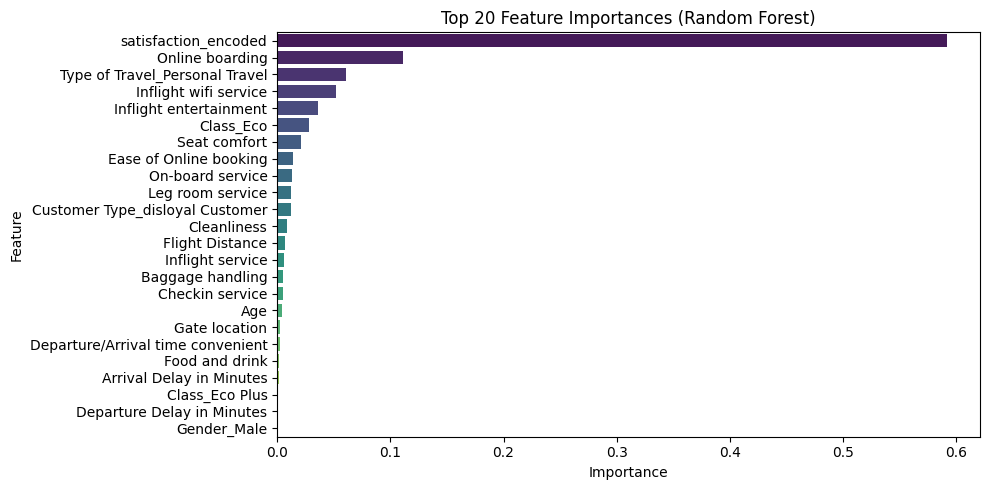

In [140]:
from sklearn.preprocessing import LabelEncoder
data_encoded = data.copy()
le = LabelEncoder()
data_encoded['satisfaction'] = le.fit_transform(data_encoded['satisfaction'])    # 0 = neutral/dissatisfied, 1 = satisfied

# one-hot encode categorical features
data_model = pd.get_dummies(data_encoded, drop_first=True)

# splitting data into X and y
X = data_model.drop('satisfaction', axis=1)
y = data_model['satisfaction']

# basic random forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X,y)

# plotting feature importances
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending = False)

# top 20 features
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(25), palette="viridis")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [232]:
data_model.shape

(129487, 25)

**computation of point biserial correlation for all numeric features**

In [234]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the target variable
data_corr = data.copy()
le = LabelEncoder()
data_corr["satisfaction_encoded"] = le.fit_transform(data_corr["satisfaction"])  # 0 = neutral/dissatisfied, 1 = satisfied

# Step 2: Select numeric columns
num_cols = data_corr.select_dtypes(include='number').drop(columns=["satisfaction_encoded"]).columns

# Step 3: Compute point biserial correlation
corr_results = {}
for col in num_cols:
    r, p = pointbiserialr(data_corr["satisfaction_encoded"], data_corr[col])
    corr_results[col] = {"Correlation": r, "P-value": p}

# Step 4: Convert to DataFrame and sort
import pandas as pd
corr_df = pd.DataFrame(corr_results).T.sort_values(by="Correlation", ascending=False)
print(corr_df)

                                   Correlation       P-value
Online boarding                       0.501620  0.000000e+00
Inflight entertainment                0.398334  0.000000e+00
Seat comfort                          0.348576  0.000000e+00
On-board service                      0.322329  0.000000e+00
Leg room service                      0.312557  0.000000e+00
Cleanliness                           0.306891  0.000000e+00
Flight Distance                       0.298206  0.000000e+00
Inflight wifi service                 0.283291  0.000000e+00
Baggage handling                      0.248651  0.000000e+00
Inflight service                      0.245027  0.000000e+00
Checkin service                       0.237146  0.000000e+00
Food and drink                        0.211164  0.000000e+00
Ease of Online booking                0.168704  0.000000e+00
Age                                   0.134001  0.000000e+00
Gate location                        -0.002923  2.929212e-01
Departure Delay in Minut

🟢 Final Take:
- Based on both:

  - Feature importance from Random Forest
    
  - Point-biserial correlation + visual evidence

- We can safely drop:

  - Gate location
    
  - Departure/Arrival time convenient

- evaluating the in-feature bias in categorical columns:

In [154]:
data.select_dtypes(include='O').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [158]:
data.value_counts('Customer Type')

Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64

**Model Perspective:**
- The 80-20 imbalance (Loyal ≈ 82%, Disloyal ≈ 18%) does raise a concern: If the model heavily relies on this column, it might overfit to the majority class.
- But does that mean we should drop it?  **Not necessarily.**

**Business Perspective**
- in business point of view we can keep the "Customer Type" column for now
- it has meaningful business value and can strengthen segmentation in our analysis.

In [169]:
data.value_counts('Class')

Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64

**From a Modeling POV:**
   - The class imbalance (especially the low Eco Plus count) doesn’t break your model, but it can cause:
   - The model to pay more attention to the behavior of Eco and Business flyers
   - Fewer learned patterns from Eco Plus → higher misclassification rate

**But we can keep the column intact, because:**
   - It reflects business-critical segments.
   - Model can still learn from small classes, especially with tree-based models like Random Forest. 

### Now let's jump into preprocessing 🏃‍♂️‍➡️